In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def plot_performance(metric, analysis_type, has_random=True): #analysis_type = missingness or noisiness
    metric_dict = metrics_dict[metric]
    df= pd.DataFrame()
    if analysis_type == 'noisiness':
         df[analysis_type] = [0, 0.2, 0.4, 0.6]
    elif analysis_type == 'missingness':
        df[analysis_type] = [0, 0.1, 0.2, 0.3]
    else:
        print('Unknown analysis type')
        return
    if has_random:
        df['random agent'] = metric_dict['random agent']
    #df['dt agent'] = metric_dict['dt agent']
    df['DDQN-PER'] = metric_dict['ddqn_pr']
    df['DQN-PER'] = metric_dict['dqn_pr']
    df['RF'] = metric_dict['random forest']
    df['SVM'] = metric_dict['SVM']
    df['XGBoost'] = metric_dict['XGBoost']
    df['DT'] = metric_dict['decision tree']
    #if metric not in ['episode_length', 'episode_reward']:
    #    df['decision tree'] = metric_dict['decision tree']
    
    plt.title(metric)
    plt.ylabel(metric)
    plt.set_ylim([0, 100])
    sns.lineplot(x=analysis_type, y='value', hue='variable', 
             data=pd.melt(df, [analysis_type]))
    

In [9]:
def pretty_plot_performance(analysis_type, success_dict, filename, has_random=True):
    if analysis_type == 'Noisiness':
        xticks = [0.0, 0.1, 0.2, 0.3]
    else:
        xticks = [0.0, 0.1, 0.2, 0.3]
    df = pd.DataFrame()
    df['DDQN-PER'] = success_dict['ddqn_pr']
    df['DQN-PER'] = success_dict['dqn_pr']
    df['RF'] = success_dict['random forest']
    df['SVM'] = success_dict['SVM']
    df['XGBoost'] = success_dict['XGBoost']
    df['DT'] = success_dict['decision tree']
    plt.figure(figsize=(8, 5))
    ax = sns.lineplot(data=df, linewidth=2.5)
    ax.set_xticks(range(len(df))) # <--- set the ticks first
    ax.set_xticklabels(xticks)
    ax.set_ylim([0, 100])
    ax.set(xlabel=f'Level of {analysis_type}', ylabel='Success Rate', title='Model Performance')
    ax.legend(title='Models', title_fontsize = 13)
    plt.savefig(f'../../final/images/{filename}.png')
    plt.show()

### Noisiness

In [4]:
noisiness_dict = {'decision tree': [99.943, 85.264, 82.900, 79.900], 
                  'dqn agent': [95.000, 96.243, 97.269, 96.621], 
                  'random forest': [99.907, 98.757, 96.736, 94.986], 
                  'SVM':[83.771, 75.207, 73.157, 72.157], 
                  'XGBoost':[99.986, 98.607, 96.728, 95.086]}

In [ ]:
pretty_plot_performance('Noisiness', noisiness_dict, 'plot_noisiness', False)

### Missingness 

In [ ]:
missingness_dict = {'decision tree': [99.943, 95.386, 93.893, 93.221], 
                    'dqn agent': [95.000, 96.714, 94.150, 94.357], 
                    'random forest': [99.907, 97.186, 93.193, 91.200], 
                    'SVM':[83.771, 63.721, 54.007, 51.314], 
                    'XGBoost':[99.986, 97.829, 93.821, 91.521]}

In [ ]:
pretty_plot_performance('Missingness', missingness_dict, 'plot_missingness', False)

### Constant noise (0.4) and varying missingness

In [ ]:
noisiness_missingness_dict = {'decision tree': [99.943, 81.250, 79.129, 77.036], 
                              'dqn agent': [95.000, 94.529, 92.064, 89.779], # This 91 is a placeholder
                              'random forest': [99.907, 95.029, 92.379, 90.736], 
                              'SVM':[83.771, 57.664, 48.671, 46.185], 
                              'XGBoost':[99.986, 95.286, 92.507, 90.679]}

In [ ]:
pretty_plot_performance('Missingness', noisiness_missingness_dict, 'plot_constant_noisiness', False)

### Varying noise + constant missingness (0.3)

In [ ]:
var_noise_const_miss_dict = {'decision tree': [99.943, 79.235, 77.036, 74.321], 
                             'dqn agent': [95.000, 88.543, 89.779, 78.121], 
                             'random forest': [99.907, 91.179, 90.736, 90.286], 
                             'SVM':[83.771, 47.029, 46.185, 45.186], 
                             'XGBoost':[99.986, 91.057, 90.679, 90.050]}

In [ ]:
pretty_plot_performance('Noisiness', var_noise_const_miss_dict, 'plot_constant_missingness', False)

### Variable training sizes

In [ ]:
sizes = [1, 0.5, 0.1, 0.05, 0.1]
variable_success_rates_6m = [95.000, 90.942, 93.829, 91.550, 79.350]
variable_df = pd.DataFrame()
#variable_df['training set size'] = sizes
variable_df['Success Rate'] = variable_success_rates_6m
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=variable_df, linewidth=2.5)
ax.set_xticks(range(len(variable_df))) # <--- set the ticks first
ax.set_xticklabels(sizes)
ax.set(xlabel='Training Size', ylabel='Success Rate', title='Variable Training Sizes')
ax.set_ylim([0, 100])
#ax.legend(title='Models', title_fontsize = 13)
plt.savefig(f'../../final/images/varied_training_size_6m.png')
plt.show()

In [ ]:
##### real one 
rf_results_mean_std_dict = {1: [99.89714285714287, 0.013248026422134872],
                            0.5: [99.80999999999999, 0.023299294900430163],
                            0.1: [98.85285714285715, 0.19921273625377012],
                            0.05: [98.00428571428571, 0.12573051843250446],
                            0.01: [93.31285714285714, 1.14050114298183]}

sizes = ['n', '0.5n', '0.1n', '0.05n', '0.01n']
variable_means_6m = [95.000, 95.188, 93.529, 91.753, 85.071]
variable_stds_6m = [0, 2.317, 1.724, 4.949, 6.416]
variable_means_rf = [i[0] for i in rf_results_mean_std_dict.values()]
variable_stds_rf = [i[1] for i in rf_results_mean_std_dict.values()]

lower_bounds_6m = [variable_means_6m[i]-1.96*variable_stds_6m[i] for i in range(len(variable_means_6m))]
upper_bounds_6m = [variable_means_6m[i]+1.96*variable_stds_6m[i] for i in range(len(variable_means_6m))]

lower_bounds_rf = [variable_means_rf[i]-1.96*variable_stds_rf[i] for i in range(len(variable_means_rf))]
upper_bounds_rf = [variable_means_rf[i]+1.96*variable_stds_rf[i] for i in range(len(variable_means_rf))]

plt.figure(figsize=(8, 5))
#plt.title('Varied Training Sizes: $\it{n=56000}$')
text_to_italic = 'n = 56000'
plt.title('Varied Training Sizes; $\it{n = 56000}$')
plt.xlabel('Training set size')
plt.ylabel('Success rate')
plt.ylim(0, 100)
#plt.title('$\Gamma + \mathit{\Gamma}$', fontsize=40)
plt.plot(sizes, variable_means_6m, linewidth=2.5, label='DQN', color='blue')
plt.plot(sizes, variable_means_rf, linewidth=2.5, label='RF', color='red')
plt.fill_between(sizes, lower_bounds_6m, upper_bounds_6m, alpha=0.2, color='blue')
plt.fill_between(sizes, lower_bounds_rf, upper_bounds_rf, alpha=0.2, color='red')
plt.legend(loc='lower left')
plt.savefig(f'../../final/images/varied_training_size_with_bounds.png')
plt.show()

In [ ]:
#sizes = [1, 0.5, 0.1, 0.05, 0.01]
sizes = [0.01, 0.05, 0.1, 0.5, 1]
#variable_success_rates_opt = [95.000, 94.900, 96.807, 97.014, 95.029]
variable_success_rates_opt = [95.029, 97.014, 96.807, 94.900, 95.000]
variable_opt_df = pd.DataFrame()
#variable_df['training set size'] = sizes
variable_opt_df['Success Rate'] = variable_success_rates_opt
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=variable_opt_df, linewidth=2.5)
ax.set_xticks(range(len(variable_opt_df))) # <--- set the ticks first
ax.set_xticklabels(sizes)
ax.set(xlabel='Training Size', ylabel='Success Rate', title='Variable Training Sizes')
ax.set_ylim([0, 100])
#ax.legend(title='Models', title_fontsize = 13)
plt.savefig(f'../../final/images/varied_training_size_opt.png')
plt.show()

### Latest Plots - ML4HC

#### Missingness

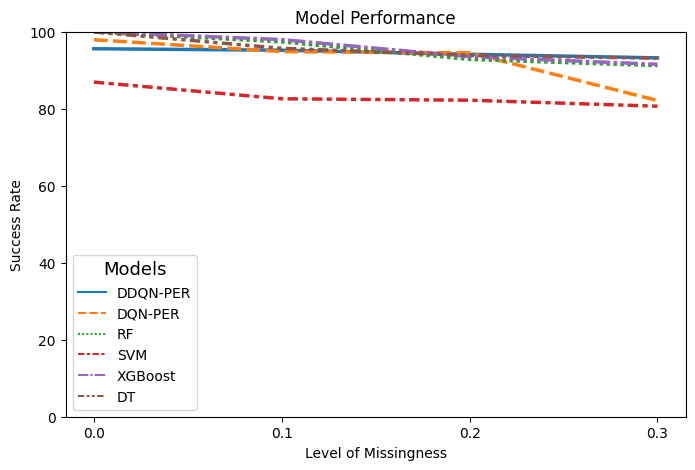

In [10]:
missingness_dict = {'decision tree': [99.936, 95.693, 93.857, 93.136], 
                    'ddqn_pr': [95.579, 95.200, 94.143, 93.207], 
                    'dqn_pr': [97.921, 94.836, 94.514, 82.129], 
                    'random forest': [99.907, 97.364, 92.807, 91.193], 
                    'SVM':[86.914, 82.586, 82.214, 80.650], 
                    'XGBoost':[99.986, 97.964, 93.514, 91.536]}

pretty_plot_performance('Missingness', missingness_dict, 'plot_missingness', False)

#### Noisiness

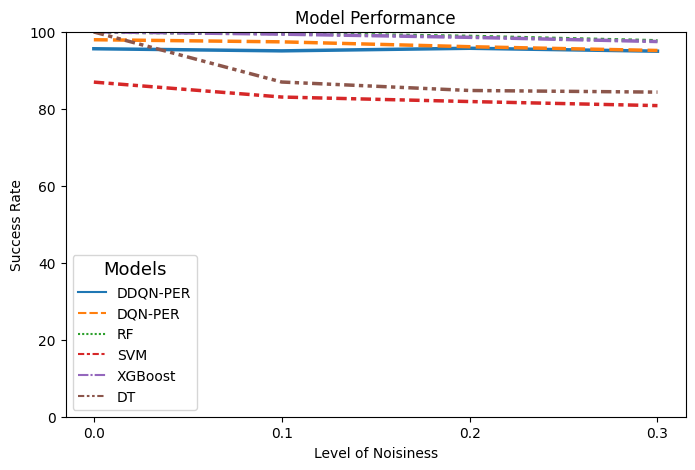

In [11]:
# noisiness_dict = {'decision tree': [99.936, 86.936, 84.736, 84.314, 82.840], 
#                   'dqn agent': [95.579, 95.029, 95.700, 94.943, 94.268], 
#                   'random forest': [99.907, 99.536, 98.786, 97.643, 96.508], 
#                   'SVM':[86.914, 83.036, 81.864, 80.807, 76.254], 
#                   'XGBoost':[99.986, 99.371, 98.543, 97.450, 96.403]}
noisiness_dict = {'decision tree': [99.936, 86.936, 84.736, 84.314], 
                  'ddqn_pr': [95.579, 95.029, 95.700, 94.943], 
                  'dqn_pr': [97.921, 97.371, 96.107, 95.129], 
                  'random forest': [99.907, 99.536, 98.786, 97.643], 
                  'SVM':[86.914, 83.036, 81.864, 80.807], 
                  'XGBoost':[99.986, 99.371, 98.543, 97.450]}

pretty_plot_performance('Noisiness', noisiness_dict, 'plot_noisiness', False)

#### Constant noise and varying missingness

In [12]:
# noisiness_missingness_dict = {'decision tree': [99.936, 82.264, 81.450, 79.014, 77.986], 
#                               'dqn agent': [95.579, 95.436, 91.807, 92.421, 93.286], # This 91 is a placeholder
#                               'random forest': [99.907, 96.071, 92.529, 90.886, 90.050], 
#                               'SVM':[86.914, 79.679, 79.443, 78.100, 76.271], 
#                               'XGBoost':[99.986, 96.393, 92.650, 90.929, 90.314]}

noisiness_missingness_dict = {'decision tree': [99.936, 82.264, 81.450, 79.014], 
                              'ddqn_pr': [95.579, 95.436, 91.807, 92.421],
                              'dqn_pr': [97.921, 94.679, 93.629, 80.100],
                              'random forest': [99.907, 96.071, 92.529, 90.886], 
                              'SVM':[86.914, 79.679, 79.443, 78.100], 
                              'XGBoost':[99.986, 96.393, 92.650, 90.929]}

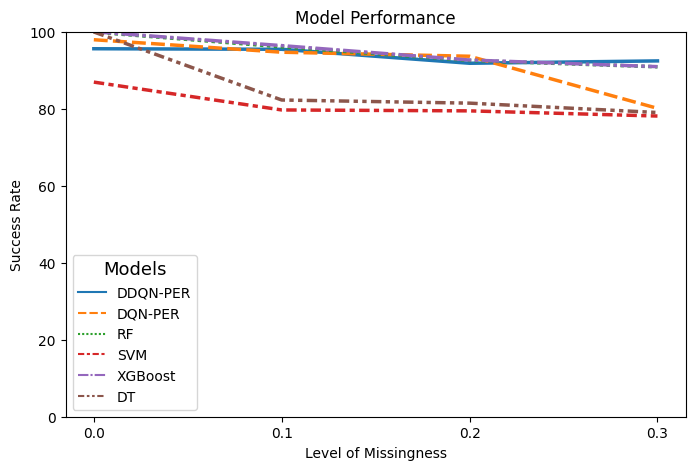

In [13]:
pretty_plot_performance('Missingness', noisiness_missingness_dict, 'plot_constant_noisiness', False)

#### Variable training sizes

In [23]:
rf = [96.571, 81.950, 95.979, 94.064, 95.564]
np.mean(rf), np.std(rf)

(92.82559999999998, 5.500601734355976)

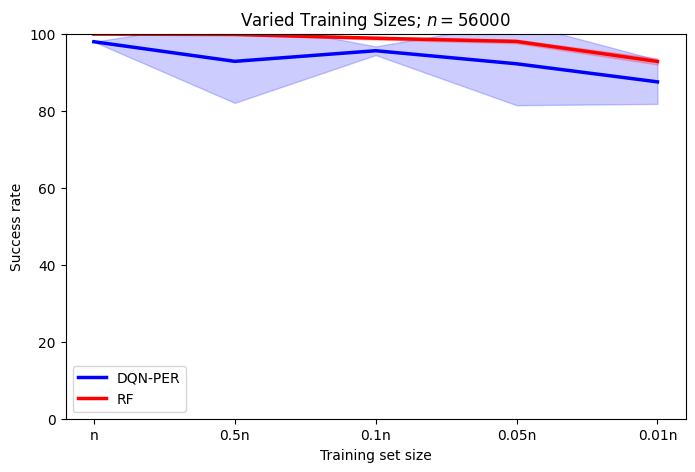

In [26]:
rf_results_mean_std_dict = {1: [99.907, 0],
                            0.5: [99.798, 0.021],
                            0.1: [98.83420000000001, 0.18935934093675114],
                            0.05: [97.9944, 0.24743694146185868],
                            0.01: [92.7986, 0.4079752933695877]}

dqn_results_mean_std_dict = {1: [97.921, 0],
                            0.5: [92.826, 5.501],
                            0.1: [95.583, 0.576],
                            0.05: [92.191, 5.490],
                            0.01: [87.497, 2.924]}


sizes = ['n', '0.5n', '0.1n', '0.05n', '0.01n']
variable_means_dqn = [i[0] for i in dqn_results_mean_std_dict.values()]
variable_stds_dqn = [i[1] for i in dqn_results_mean_std_dict.values()]
variable_means_rf = [i[0] for i in rf_results_mean_std_dict.values()]
variable_stds_rf = [i[1] for i in rf_results_mean_std_dict.values()]

lower_bounds_dqn = [variable_means_dqn[i]-1.96*variable_stds_dqn[i] for i in range(len(variable_means_dqn))]
upper_bounds_dqn = [variable_means_dqn[i]+1.96*variable_stds_dqn[i] for i in range(len(variable_means_dqn))]

lower_bounds_rf = [variable_means_rf[i]-1.96*variable_stds_rf[i] for i in range(len(variable_means_rf))]
upper_bounds_rf = [variable_means_rf[i]+1.96*variable_stds_rf[i] for i in range(len(variable_means_rf))]

plt.figure(figsize=(8, 5))
#plt.title('Varied Training Sizes: $\it{n=56000}$')
text_to_italic = 'n = 50400'
plt.title('Varied Training Sizes; $\it{n = 56000}$')
plt.xlabel('Training set size')
plt.ylabel('Success rate')
plt.ylim(0, 100)
#plt.title('$\Gamma + \mathit{\Gamma}$', fontsize=40)
plt.plot(sizes, variable_means_dqn, linewidth=2.5, label='DQN-PER', color='blue')
plt.plot(sizes, variable_means_rf, linewidth=2.5, label='RF', color='red')
plt.fill_between(sizes, lower_bounds_dqn, upper_bounds_dqn, alpha=0.2, color='blue')
plt.fill_between(sizes, lower_bounds_rf, upper_bounds_rf, alpha=0.2, color='red')
plt.legend(loc='lower left')
# plt.savefig(f'../../final/images/varied_training_size_with_bounds.png')
plt.show()